In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
## Loading LMO_Detailed_Industries_by_NAICS data
lmo_detailed_industries_data = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
lmo_detailed_industries_data.head(10)

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing",311 & 312


In [5]:
#cleaning the NAICS column
lmo_detailed_industries_data['NAICS'] = lmo_detailed_industries_data['NAICS'].astype(str).str.replace(' &', ',').str.split(', ')
lmo_detailed_industries_data.head(10)

,LMO_Detailed_Industry,NAICS
0,Farms,"[111, 112]"
1,"Fishing, hunting and trapping",[114]
2,Forestry and logging,[113]
3,Support activities for agriculture and forestry,[115]
4,Oil and gas extraction,[211]
5,Support activities for mining and oil and gas ...,[213]
6,Mining,[212]
7,Utilities,[22]
8,Construction,[23]
9,"Food, beverage and tobacco manufacturing","[311, 312]"


In [15]:
# Get the data of 2digit NAICS industries
dataframe_2_naics = pd.read_csv('RTRA_Employ_2NAICS_97_99.csv')

list_2_naics = ['RTRA_Employ_2NAICS_00_05.csv',
                'RTRA_Employ_2NAICS_06_10.csv',
                'RTRA_Employ_2NAICS_11_15.csv',
                'RTRA_Employ_2NAICS_16_20.csv']

for file_p in list_2_naics:
    df = pd.read_csv(file_p)
    dataframe_2_naics = dataframe_2_naics.append(df, ignore_index=True)

dataframe_2_naics.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000
5,1997,1,Educational services [61],118750
6,1997,1,Finance and insurance [52],77500
7,1997,1,Health care and social assistance [62],183000
8,1997,1,Information and cultural industries [51],40500
9,1997,1,Management of companies and enterprises [55],1750


In [16]:
# Separate the Industry description and NAICS code then get the NAICS_CODE
def clean_col (df):  
    df1=pd.DataFrame(df.NAICS.astype('str').str.split('[').to_list(), columns=['NAICS','NAICS_CODE'])
    df1['NAICS_CODE']= df1.NAICS_CODE.astype('str').str.strip(']').str.replace('-',',')
    df['NAICS']=df1['NAICS']
    df['NAICS_CODE']= df1['NAICS_CODE']
    return df

clean_col(dataframe_2_naics)
dataframe_2_naics.head(10)

   

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE
0,1997,1,Accommodation and food services,129250,72
1,1997,1,"Administrative and support, waste management a...",58500,56
2,1997,1,"Agriculture, forestry, fishing and hunting",62250,11
3,1997,1,"Arts, entertainment and recreation",38750,71
4,1997,1,Construction,118000,23
5,1997,1,Educational services,118750,61
6,1997,1,Finance and insurance,77500,52
7,1997,1,Health care and social assistance,183000,62
8,1997,1,Information and cultural industries,40500,51
9,1997,1,Management of companies and enterprises,1750,55


In [17]:
# Function to get the 'LMO_Detailed_Industry' values for a NAICS code in RTRA files
def add_lmo_industry(df):
    lmo_df = lmo_detailed_industries_data.apply(lambda y: y["LMO_Detailed_Industry"] 
                                                if (df['NAICS_CODE'] in y['NAICS'])
                                                else np.nan, axis=1)
    lmo_df = lmo_df.dropna(how='all', axis=0)
    if lmo_df.empty:
        lmo_df = np.nan
    else:
        lmo_df = lmo_df.to_string(index=False)
    return lmo_df 

In [18]:
dataframe_2_naics["LMO_Detailed_Industry"] = dataframe_2_naics.apply(add_lmo_industry, axis=1)
dataframe_2_naics.head(10)

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
0,1997,1,Accommodation and food services,129250,72,NaN
1,1997,1,"Administrative and support, waste management a...",58500,56,"Business, building and other support services"
2,1997,1,"Agriculture, forestry, fishing and hunting",62250,11,NaN
3,1997,1,"Arts, entertainment and recreation",38750,71,NaN
4,1997,1,Construction,118000,23,Construction
5,1997,1,Educational services,118750,61,NaN
6,1997,1,Finance and insurance,77500,52,NaN
7,1997,1,Health care and social assistance,183000,62,NaN
8,1997,1,Information and cultural industries,40500,51,NaN
9,1997,1,Management of companies and enterprises,1750,55,"Business, building and other support services"


In [19]:
#applying the fct on our df
df1 = dataframe_2_naics.dropna()
df1

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
1,1997,1,"Administrative and support, waste management a...",58500,56,"Business, building and other support services"
4,1997,1,Construction,118000,23,Construction
9,1997,1,Management of companies and enterprises,1750,55,"Business, building and other support services"
12,1997,1,Other services (except public administration),89250,81,"Repair, personal and non-profit services"
15,1997,1,"Real estate, rental and leasing",50750,53,Real estate rental and leasing
...,...,...,...,...,...,...
5457,2019,12,Construction,0,23,Construction
5464,2019,12,Other services (except public administration),0,81,"Repair, personal and non-profit services"
5467,2019,12,"Real estate, rental and leasing",0,53,Real estate rental and leasing
5470,2019,12,Utilities,0,22,Utilities


In [20]:
#do the same steps to create our 3_DIGITS 
dataframe_3_naics = pd.read_csv('RTRA_Employ_3NAICS_97_99.csv')

list_3_naics = ['RTRA_Employ_3NAICS_00_05.csv',
                'RTRA_Employ_3NAICS_06_10.csv',
                'RTRA_Employ_3NAICS_11_15.csv',
                'RTRA_Employ_3NAICS_16_20.csv'
                ]

for file_p in list_3_naics:
    df = pd.read_csv(file_p)
    dataframe_3_naics = dataframe_3_naics.append(df, ignore_index=True)

# Separate the Industry description and NAICS code then get the NAICS_CODE
df1 = pd.DataFrame(dataframe_3_naics['NAICS'].str.split('[').tolist(), columns=['NAICS','NAICS_CODE'])
df1['NAICS_CODE']= df1.NAICS_CODE.str.strip(']').str.replace('-',',')
dataframe_3_naics['NAICS']=df1['NAICS']
dataframe_3_naics['NAICS_CODE']= df1['NAICS_CODE']
dataframe_3_naics.head()


# Function to get the 'LMO_Detailed_Industry' values for a NAICS code in RTRA files
def add_lmo_industry(df):
    lmo_df = lmo_detailed_industries_data.apply(lambda y: y["LMO_Detailed_Industry"] 
                                                if (df['NAICS_CODE'] in y['NAICS'])
                                                else np.nan, axis=1)
    lmo_df = lmo_df.dropna(how='all', axis=0)
    if lmo_df.empty:
        lmo_df = np.nan
    else:
        lmo_df = lmo_df.to_string(index=False)
    return lmo_df 

dataframe_3_naics["LMO_Detailed_Industry"] = dataframe_3_naics.apply(add_lmo_industry, axis=1)
df2= dataframe_3_naics.dropna()
df2


,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
0,1997,1,Aboriginal public administration,500,914,Local and Indigenous public administration
1,1997,1,Accommodation services,24000,721,Accommodation services
3,1997,1,Air transportation,17000,481,Air transportation
4,1997,1,Ambulatory health care services,40000,621,Ambulatory health care services
5,1997,1,"Amusement, gambling and recreation industries",20000,713,"Amusement, gambling and recreation industries"
...,...,...,...,...,...,...
28131,2019,12,Textile product mills,0,314,Other manufacturing
28134,2019,12,Truck transportation,0,484,Truck transportation
28136,2019,12,Warehousing and storage,0,493,Warehousing and storage
28138,2019,12,Water transportation,0,483,Water transportation


In [21]:
#do the same steps to create our 4_DIGITS DF
dataframe_4_naics = pd.read_csv('RTRA_Employ_4NAICS_97_99.csv')

file_4_naics = ['RTRA_Employ_4NAICS_00_05.csv',
                'RTRA_Employ_4NAICS_06_10.csv',
                'RTRA_Employ_4NAICS_11_15.csv',
                'RTRA_Employ_4NAICS_16_20.csv']

for file_p in file_4_naics:
    df = pd.read_csv(file_p)
    dataframe_4_naics = dataframe_4_naics.append(df, ignore_index=True)

# Separate the Industry description and NAICS code then get the NAICS_CODE

dataframe_4_naics['NAICS']=df1['NAICS']
dataframe_4_naics['NAICS_CODE']= df1['NAICS_CODE']


# Function to get the 'LMO_Detailed_Industry' values for a NAICS code in RTRA files
def add_lmo_industry(df):
    lmo_df = lmo_detailed_industries_data.apply(lambda y: y["LMO_Detailed_Industry"] 
                                                if (df['NAICS_CODE'] in y['NAICS'])
                                                else np.nan, axis=1)
    lmo_df = lmo_df.dropna(how='all', axis=0)
    if lmo_df.empty:
        lmo_df = np.nan
    else:
        lmo_df = lmo_df.to_string(index=False)
    return lmo_df 

dataframe_4_naics["LMO_Detailed_Industry"] = dataframe_4_naics.apply(add_lmo_industry, axis=1)
df3= dataframe_4_naics.dropna()
df3


,SYEAR,SMTH,NAICS,_EMPLOYMENT_,NAICS_CODE,LMO_Detailed_Industry
0,1997,1,Aboriginal public administration,3500,914,Local and Indigenous public administration
1,1997,1,Accommodation services,250,721,Accommodation services
3,1997,1,Air transportation,2250,481,Air transportation
4,1997,1,Ambulatory health care services,5250,621,Ambulatory health care services
5,1997,1,"Amusement, gambling and recreation industries",250,713,"Amusement, gambling and recreation industries"
...,...,...,...,...,...,...
28131,2004,7,Textile product mills,55000,314,Other manufacturing
28134,2004,7,Truck transportation,11000,484,Truck transportation
28136,2004,7,Warehousing and storage,19000,493,Warehousing and storage
28138,2004,7,Water transportation,4500,483,Water transportation


In [22]:
# Creating a single dataframe with the columns Year, Month and LMO Industry and Employment from all the 2, 3 and 4 digits NAICS
df=df1.append(df2)
DF_NAICS=df.append(df3)

# drop rows with NaN values
naics_employment_detail_df = DF_NAICS.dropna(axis=0, how='any')
naics_employment_detail_df


,NAICS,NAICS_CODE,SYEAR,SMTH,_EMPLOYMENT_,LMO_Detailed_Industry
0,Aboriginal public administration,914,1997.0,1.0,500.0,Local and Indigenous public administration
1,Accommodation services,721,1997.0,1.0,24000.0,Accommodation services
3,Air transportation,481,1997.0,1.0,17000.0,Air transportation
4,Ambulatory health care services,621,1997.0,1.0,40000.0,Ambulatory health care services
5,"Amusement, gambling and recreation industries",713,1997.0,1.0,20000.0,"Amusement, gambling and recreation industries"
...,...,...,...,...,...,...
28131,Textile product mills,314,2004.0,7.0,55000.0,Other manufacturing
28134,Truck transportation,484,2004.0,7.0,11000.0,Truck transportation
28136,Warehousing and storage,493,2004.0,7.0,19000.0,Warehousing and storage
28138,Water transportation,483,2004.0,7.0,4500.0,Water transportation


In [23]:
#filtering our df
DF_NAICS_97_18 = DF_NAICS[~((DF_NAICS.index).astype('str')>'2019')]
DF_NAICS_97_18

,NAICS,NAICS_CODE,SYEAR,SMTH,_EMPLOYMENT_,LMO_Detailed_Industry
0,Aboriginal public administration,914,NaN,NaN,NaN,NaN
1,Accommodation services,721,NaN,NaN,NaN,NaN
2,Administrative and support services,561,NaN,NaN,NaN,NaN
10,Building material and supplies merchant wholes...,416,NaN,NaN,NaN,NaN
11,"Business-to-business electronic markets, and a...",419,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
20184,Motion picture and sound recording industries,512,2002.0,6.0,0.0,Motion picture and sound recording industries
20186,Motor vehicle and parts dealers,441,2002.0,6.0,15000.0,Motor vehicle and parts dealers
20187,Non-metallic mineral product manufacturing,327,2002.0,6.0,2500.0,Other manufacturing
20188,Non-store retailers,454,2002.0,6.0,0.0,Other retail trade (excluding cars and persona...


In [24]:
#read the flat files as data 
data_output= pd.read_excel('Data_Output_Template.xlsx')
data_output

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN
...,...,...,...,...
15571,2018,12,Utilities,NaN
15572,2018,12,Warehousing and storage,NaN
15573,2018,12,Water transportation,NaN
15574,2018,12,Wholesale trade,NaN


In [32]:
cols = ["SYEAR", "SMTH", "LMO_Detailed_Industry", "_EMPLOYMENT_"]

# Creating a single dataframe with the columns Year, Month and LMO Industry and Employment from all the 2, 3 and 4 digits NAICS
naics_employment_detail_df = dataframe_2_naics[cols]
naics_employment_detail_df = naics_employment_detail_df.append(dataframe_3_naics[cols], ignore_index=True)
naics_employment_detail_df = naics_employment_detail_df.append(dataframe_4_naics[cols], ignore_index=True)

# drop rows with NaN values
naics_employment_detail_df = naics_employment_detail_df.dropna(axis=0, how='any')

# Calculate the Employment summary by Year, Month and LOM Industry
naics_employment_summary = naics_employment_detail_df.groupby(["SYEAR", "SMTH", "LMO_Detailed_Industry"], as_index=False).sum()
print(naics_employment_summary.shape)
naics_employment_summary.head()

(13524, 4)


,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,Accommodation services,30250
1,1997,1,Air transportation,25250
2,1997,1,Ambulatory health care services,56250
3,1997,1,"Amusement, gambling and recreation industries",24500
4,1997,1,"Broadcasting, data processing, and information",80500


In [33]:
cols = ["SYEAR", "SMTH", "LMO_Detailed_Industry", "_EMPLOYMENT_"]

# Creating a single dataframe with the columns Year, Month and LMO Industry and Employment from all the 2, 3 and 4 digits NAICS
naics_employment_detail_df = dataframe_2_naics[cols]
naics_employment_detail_df = naics_employment_detail_df.append(dataframe_3_naics[cols], ignore_index=True)
naics_employment_detail_df = naics_employment_detail_df.append(dataframe_4_naics[cols], ignore_index=True)

# drop rows with NaN values
naics_employment_detail_df = naics_employment_detail_df.dropna(axis=0, how='any')

# Calculate the Employment summary by Year, Month and LOM Industry
naics_employment_summary = naics_employment_detail_df.groupby(["SYEAR", "SMTH", "LMO_Detailed_Industry"], as_index=False).sum()
print(naics_employment_summary.shape)
naics_employment_summary.head()

(13524, 4)


,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,Accommodation services,30250
1,1997,1,Air transportation,25250
2,1997,1,Ambulatory health care services,56250
3,1997,1,"Amusement, gambling and recreation industries",24500
4,1997,1,"Broadcasting, data processing, and information",80500


In [35]:
# Read 'Data_Output_Template' file
data_output = pd.read_excel('Data_Output_Template.xlsx')
# Crate Year, Month and LMO_Detailed_industry combined idx to get the data_output formatted result 
naics_employment_summary1 = naics_employment_summary.copy() 
naics_employment_summary1['idx'] = naics_employment_summary1["SYEAR"].astype(str) + '-' + naics_employment_summary1["SMTH"].astype(str) + '-' + naics_employment_summary1["LMO_Detailed_Industry"] 

data_output1 = data_output.copy() 
data_output1['idx'] = data_output1["SYEAR"].astype(str) + '-' + data_output1["SMTH"].astype(str) + '-' + data_output1["LMO_Detailed_Industry"] 

# Merge the two dataframes data_output1 and naics_employment_summary1
combined_data = pd.merge(data_output1, naics_employment_summary1, left_on='idx', right_on='idx', how='left')

# Fille tha NaN values with zero in '_EMPLOYMENT_' column
combined_data["_EMPLOYMENT_"] = combined_data["_EMPLOYMENT_"].fillna(0)

# Get the month wise employment summary data into "Employment" column of dat_output dataframe
data_output["Employment"] = combined_data["_EMPLOYMENT_"].astype(np.int)
data_output.head()

<ipython-input-35-38524b7ba5e9>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_output["Employment"] = combined_data["_EMPLOYMENT_"].astype(np.int)


,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,30250
1,1997,1,Air transportation,25250
2,1997,1,Ambulatory health care services,56250
3,1997,1,"Amusement, gambling and recreation industries",24500
4,1997,1,"Architectural, engineering and related services",0


In [36]:
# create a dataframe with industry wise employment summary
industry_wise_summary = data_output.groupby(["LMO_Detailed_Industry"])["Employment"].sum()
industry_wise_summary.head()

LMO_Detailed_Industry
Accommodation services                             11221750
Air transportation                                  5773250
Ambulatory health care services                    18918000
Amusement, gambling and recreation industries      10147000
Architectural, engineering and related services           0
Name: Employment, dtype: int32

Text(0.5, 1.0, 'Employment wise Top 10 Industries Bar plot')

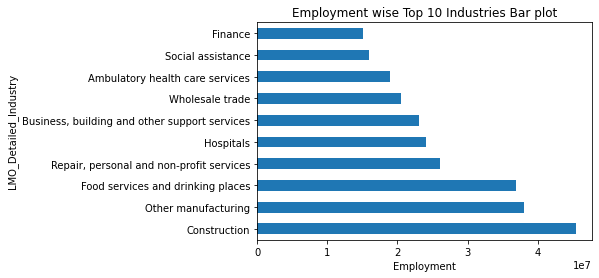

In [37]:
# Plotting employment wise top 10 Industries.
industry_wise_summary.sort_values(ascending=False)[:10].plot(kind='barh')
plt.xlabel("Employment")
plt.title("Employment wise Top 10 Industries Bar plot")

In [38]:
# Create a dataframe with Year and Month as index
month_wise_employment_summary = data_output.copy()
month_wise_employment_summary['month_idx'] = pd.to_datetime([f'{y}-{m}' for y, m in zip(month_wise_employment_summary.SYEAR, month_wise_employment_summary.SMTH)])
month_wise_employment_summary.index = month_wise_employment_summary["month_idx"]
month_wise_employment_summary.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment,month_idx
month_idx,,,,,
1997-01-01,1997,1,Accommodation services,30250,1997-01-01
1997-01-01,1997,1,Air transportation,25250,1997-01-01
1997-01-01,1997,1,Ambulatory health care services,56250,1997-01-01
1997-01-01,1997,1,"Amusement, gambling and recreation industries",24500,1997-01-01
1997-01-01,1997,1,"Architectural, engineering and related services",0,1997-01-01


Text(0, 0.5, 'Employment')

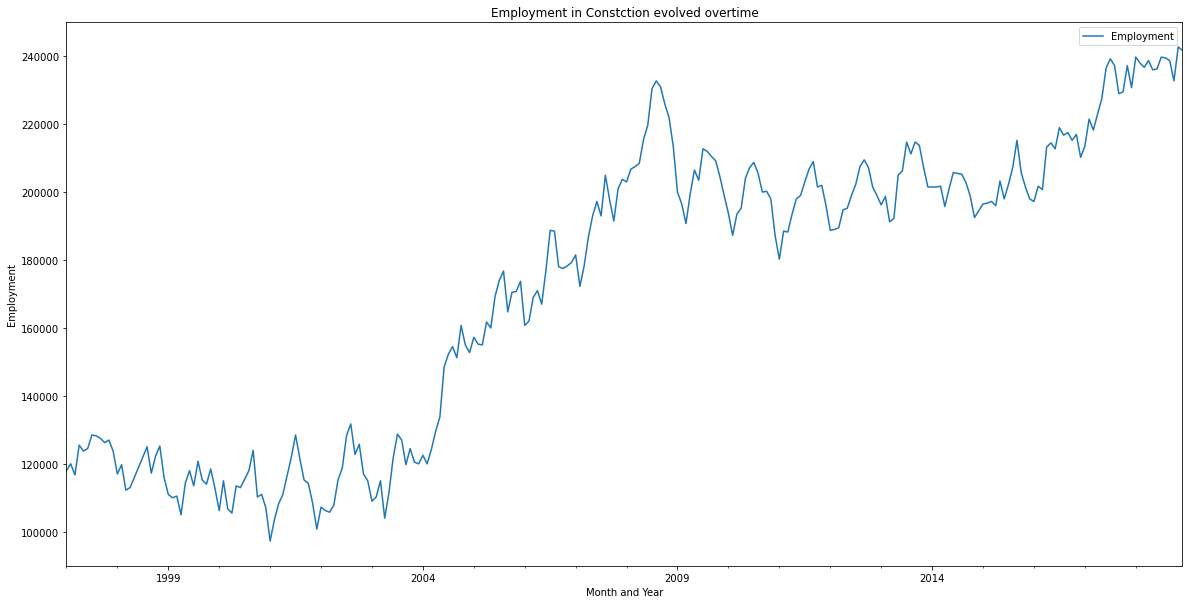

In [39]:
construction_data = month_wise_employment_summary[month_wise_employment_summary["LMO_Detailed_Industry"] == "Construction"]

construction_data.plot(y="Employment", title="Employment in Constction evolved overtime", figsize=(20,10))
plt.xlabel("Month and Year")
plt.ylabel("Employment")

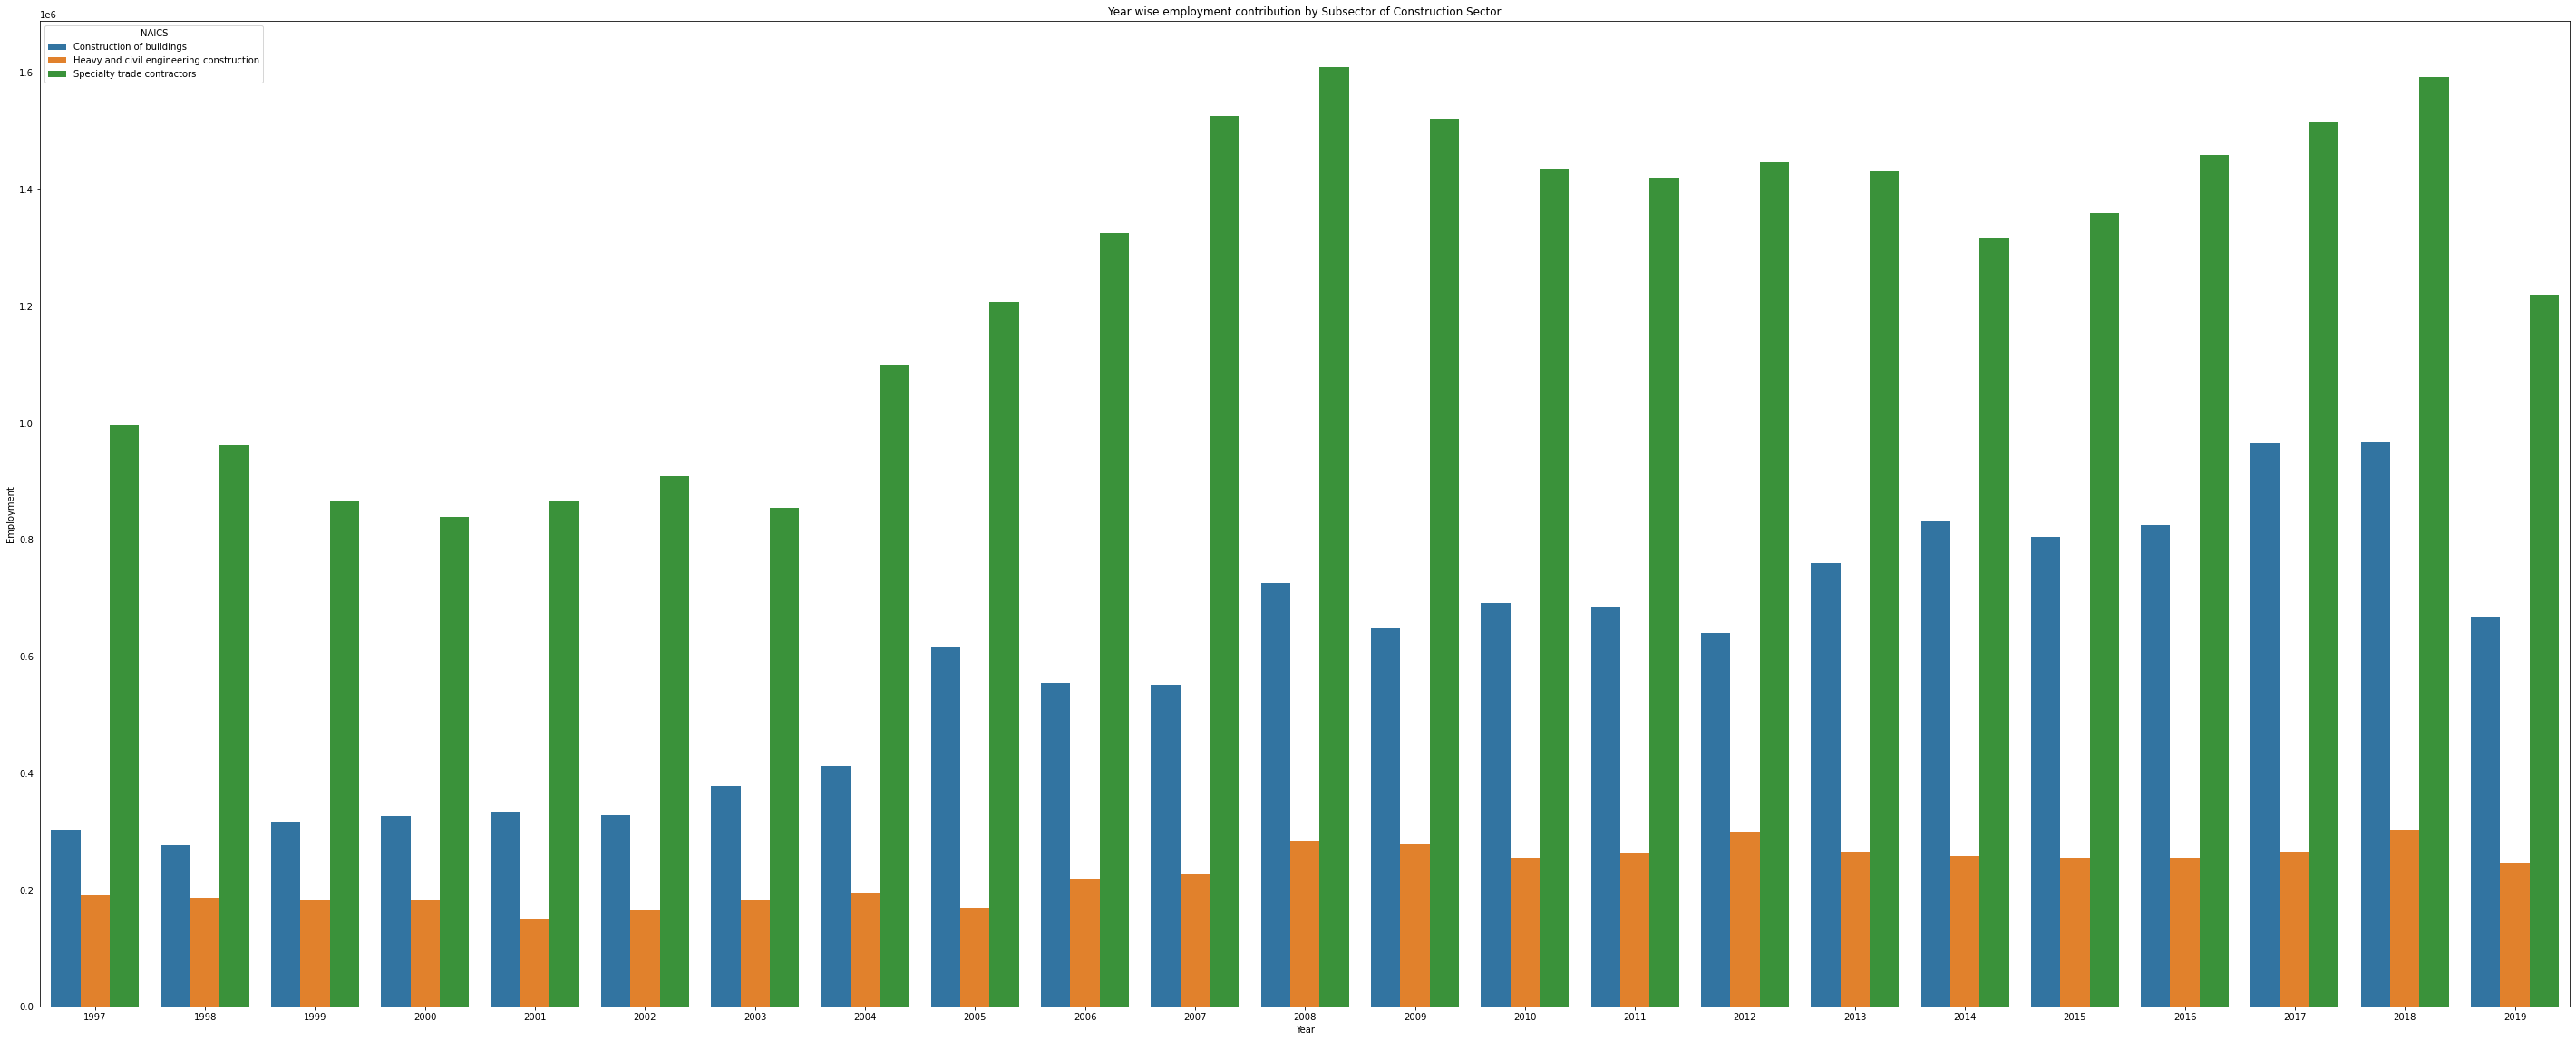

In [46]:
# Subsectors contibution towards the Construction Industry Sector
construction_subsector_data = dataframe_3_naics[dataframe_3_naics["NAICS_CODE"].str.match(r'23[0-9]') == True]
construction_subsector_summary = construction_subsector_data.groupby(["SYEAR", "NAICS"])["_EMPLOYMENT_"].sum()
construction_subsector_summary = construction_subsector_summary.reset_index()

plt.figure(figsize=(50,20))
sns.barplot(x="SYEAR", y="_EMPLOYMENT_", hue="NAICS", data=construction_subsector_summary)
plt.xlabel("Year")
plt.ylabel("Employment")
plt.title("Year wise employment contribution by Subsector of Construction Sector")
plt.show()

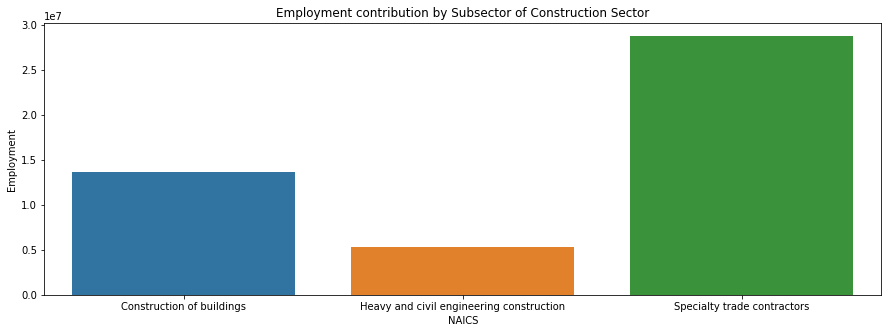

In [47]:
# Subsectors contibution towards the Construction Industry Sector
construction_subsector = construction_subsector_data.groupby(["NAICS"])["_EMPLOYMENT_"].sum()
construction_subsector = construction_subsector.reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x="NAICS", y="_EMPLOYMENT_", data=construction_subsector)
plt.ylabel("Employment")
plt.title("Employment contribution by Subsector of Construction Sector")
plt.show()

Text(0, 0.5, 'Employment')

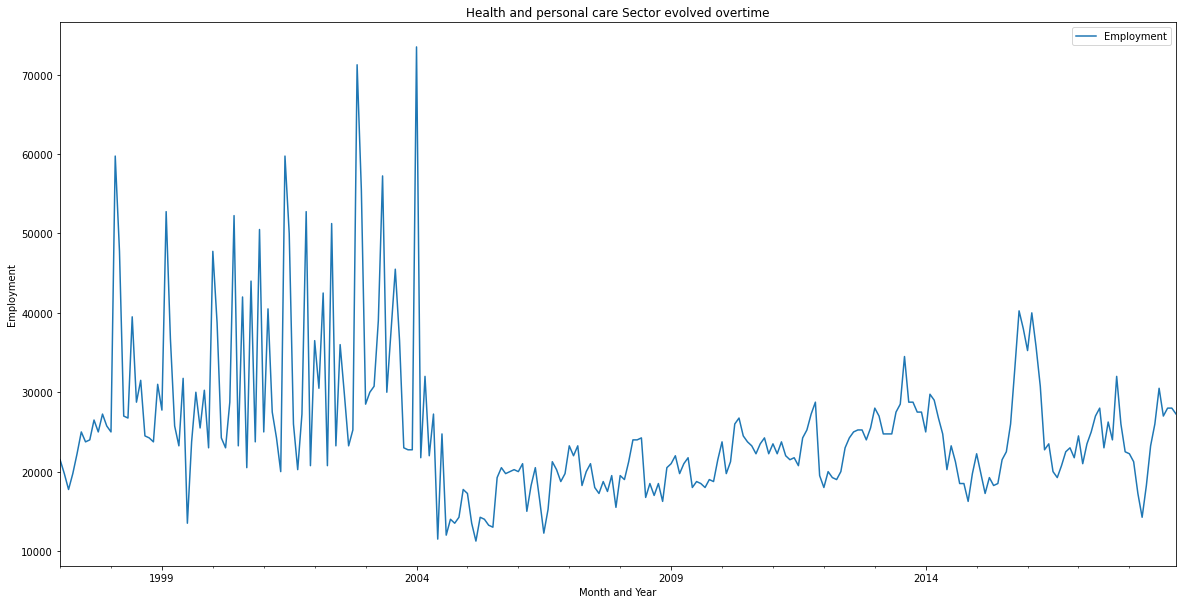

In [67]:
Health_sector_data = month_wise_employment_summary[month_wise_employment_summary["LMO_Detailed_Industry"] == "Health and personal care stores"]
Health_sector_data.plot(y="Employment", title="Health and personal care Sector evolved overtime", figsize=(20,10))
plt.xlabel("Month and Year")
plt.ylabel("Employment")

Text(0, 0.5, 'Employment')

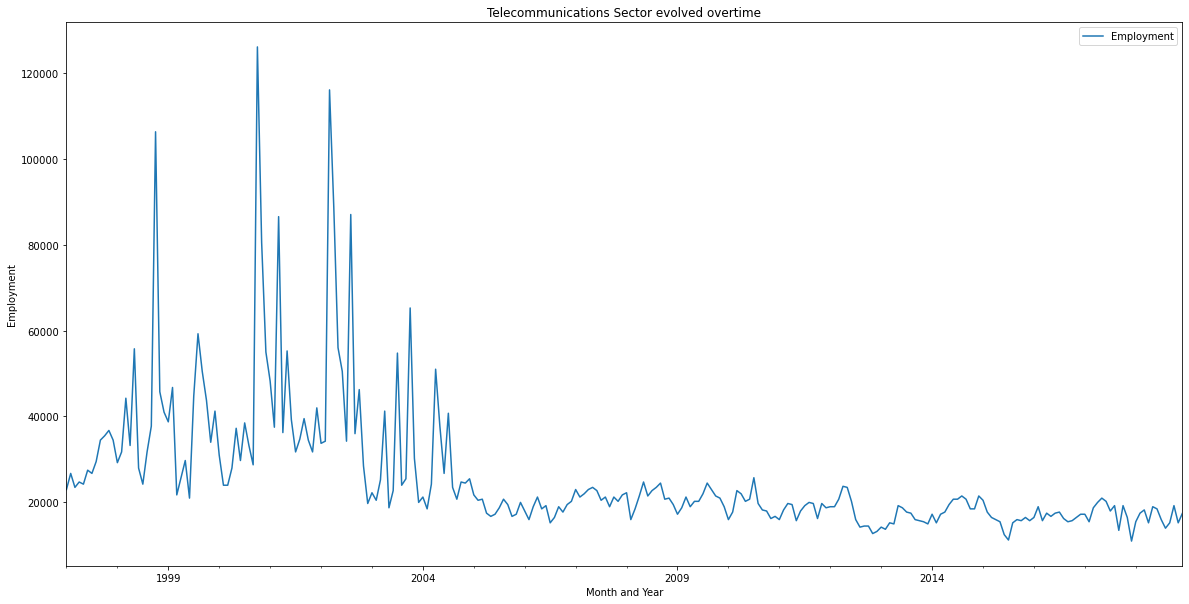

In [63]:
telecom_sector_data = month_wise_employment_summary[month_wise_employment_summary["LMO_Detailed_Industry"] == "Telecommunications"]
# repair_sector_data.head()
telecom_sector_data.plot(y="Employment", title="Telecommunications Sector evolved overtime", figsize=(20,10))
plt.xlabel("Month and Year")
plt.ylabel("Employment")

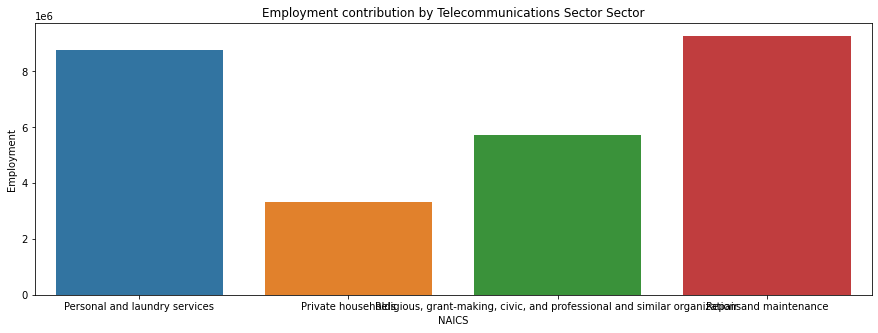

In [68]:
# Subsectors contibution towards the employment of Repair, personal and non-profit services
repair_subsector_data = dataframe_3_naics[dataframe_3_naics["NAICS_CODE"].str.match(r'81[0-9]') == True]
repair_subsector_summary = repair_subsector_data.groupby(["NAICS"])["_EMPLOYMENT_"].sum()
repair_subsector_summary = repair_subsector_summary.reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x="NAICS", y="_EMPLOYMENT_", data=repair_subsector_summary)
plt.ylabel("Employment")
plt.title("Employment contribution by Telecommunications Sector Sector")
plt.show()